In [1]:
import smtplib
from matplotlib import style
import seaborn as sns
sns.set(style='ticks', palette='RdBu')
#sns.set(style='ticks', palette='Set2')
import pandas as pd
import numpy as np
import time
import datetime 
%matplotlib inline
import matplotlib.pyplot as plt
from subprocess import check_output
pd.options.display.max_colwidth = 1000
from time import gmtime, strftime
Time_now = strftime("%Y-%m-%d %H:%M:%S", gmtime())
import timeit
start = timeit.default_timer()
pd.options.display.max_rows = 100

from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV, SelectKBest
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn import svm
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('../input/data.csv')
df = data
df['hour'] = df.timestamp.apply( lambda x: int(np.floor(x/3600))) 
df.head().T

,0,1,2,3,4
number_people,0.0,0.0,0.0,0.0,0.0
timestamp,11.0,906.0,1207.0,1507.0,1808.0
day_of_week,5.0,5.0,5.0,5.0,5.0
is_weekend,1.0,1.0,1.0,1.0,1.0
is_holiday,0.0,0.0,0.0,0.0,0.0
apparent_temperature,63.0,63.0,63.0,63.0,63.0
temperature,63.0,63.0,63.0,63.0,63.0
is_start_of_semester,0.0,0.0,0.0,0.0,0.0
hour,0.0,0.0,0.0,0.0,0.0


In [3]:
data.columns

Index(['number_people', 'timestamp', 'day_of_week', 'is_weekend', 'is_holiday',
       'apparent_temperature', 'temperature', 'is_start_of_semester', 'hour'],
      dtype='object')

In [4]:
data.head(n=2).T

,0,1
number_people,0.0,0.0
timestamp,11.0,906.0
day_of_week,5.0,5.0
is_weekend,1.0,1.0
is_holiday,0.0,0.0
apparent_temperature,63.0,63.0
temperature,63.0,63.0
is_start_of_semester,0.0,0.0
hour,0.0,0.0


In [5]:
data.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,apparent_temperature,temperature,is_start_of_semester,hour
count,26066.000000,26066.000000,26066.000000,26066.000000,26066.000000,26066.000000,26066.000000,26066.000000,26066.000000
mean,41.055743,49427.729801,3.016458,0.291759,0.011509,59.013831,59.160459,0.100169,13.257078
std,24.768592,22472.238011,2.005325,0.454581,0.106664,6.951850,6.661657,0.300231,6.232235
min,0.000000,9.000000,0.000000,0.000000,0.000000,32.320000,38.140000,0.000000,0.000000
25%,24.000000,31818.000000,1.000000,0.000000,0.000000,54.550000,54.550000,0.000000,8.000000
50%,43.000000,49824.500000,3.000000,0.000000,0.000000,58.800000,58.800000,0.000000,13.000000
75%,58.000000,68413.000000,5.000000,1.000000,0.000000,63.530000,63.530000,0.000000,19.000000
max,138.000000,86120.000000,6.000000,1.000000,1.000000,87.170000,87.170000,1.000000,23.000000


In [6]:
categorical_features = (data.select_dtypes(include=['object']).columns.values)
categorical_features

array([], dtype=object)

In [7]:
numerical_features = data.select_dtypes(include = ['float64', 'int64']).columns.values
numerical_features

array(['number_people', 'timestamp', 'day_of_week', 'is_weekend',
       'is_holiday', 'apparent_temperature', 'temperature',
       'is_start_of_semester', 'hour'], dtype=object)

In [8]:
pivot = pd.pivot_table(df,
            values = ['number_people'],
            index = ['hour'], 
                       columns= ['is_start_of_semester', 'day_of_week'],
                       aggfunc=[np.mean], 
                       margins=True).fillna('')
pivot

mean                                   \
                     number_people                                    
is_start_of_semester             0                                    
day_of_week                      0          1          2          3   
hour                                                                  
0                        23.433526  29.382353  27.867470  29.793939   
1                        10.500000  15.411765  13.281250  16.562500   
5                         1.154412   1.458647   1.590551   1.343066   
6                        13.408046  13.760479  14.298780  11.604651   
7                        23.333333  26.207101  25.597633  22.655172   
8                        32.857143  33.537143  33.680982  31.436782   
9                        38.774390  39.445714  38.814371  35.941520   
10                       42.148148  43.248521  42.331361  40.819876   
11                       47.891720  47.065868  47.497006  41.573099   
12                       48.156863  46.122807  48.892216  41.988024   
13                       46.557823  43.705882  45.295181  41.006061   
14                       42.631579  41.605263  42.417178  39.802395   
15                       47.443038  45.341463  47.880795  44.518293   
16                       57.889571  56.162500  55.917722  51.573964   
17                       65.221557  44.640316  65.993939  59.086420   
18                       69.335366  66.302326  64.481250  61.644578   
19                       62.810976  61.325301  59.677419  55.578035   
20                       60.934132  58.325301  57.149068  52.111111   
21                       65.532544  59.930636  60.353293  54.816568   
22                       61.456140  57.464706  56.186747  54.727811   
23                       50.029240  47.130178  46.063218  48.359281   
All                      44.917883  43.281858  44.163259  41.065657   

                                                                              \
                                                                               
is_start_of_semester                                           1               
day_of_week                   4          5          6          0           1   
hour                                                                           
0                     30.766871   0.652941   0.402367  15.733333   30.500000   
1                     17.406250   0.333333   0.117647   7.666667   13.250000   
5                      1.404580   0.585185   0.132353   0.750000    1.500000   
6                     11.751515   0.648810   0.371257  16.666667   21.850000   
7                     22.491018   2.536145   1.241176  30.000000   39.250000   
8                     31.065089  19.550898  14.794118  41.800000   52.950000   
9                     36.493976  33.514793  29.047619  51.850000   50.750000   
10                    42.225000  40.988024  33.988166  63.550000   58.947368   
11                    46.061728  44.159763  38.135294  71.000000   63.850000   
12                    48.246914  42.407186  37.258824  63.722222   59.750000   
13                    45.957831  40.680233  34.124260  62.750000   60.150000   
14                    46.597633  40.713450  33.545455  62.666667   54.550000   
15                    53.827160  44.200000  35.905325  65.650000   62.588235   
16                    62.539877  46.598870  39.822485  75.850000   84.944444   
17                    70.475610  49.247126  46.697674  84.705882  100.214286   
18                    62.496689  48.976879  48.360000  81.352941   90.187500   
19                    56.191083  44.488506  47.354286  85.600000   90.062500   
20                    48.000000  39.074286  47.488506  80.187500   86.333333   
21                    47.081250  42.459770  47.594286  75.611111   91.750000   
22                    43.295597  41.471264  46.057143  75.200000   78.000000   
23                     8.156250   7.141176  35.085714  56.600000   67.600000   
All                   40.772783 

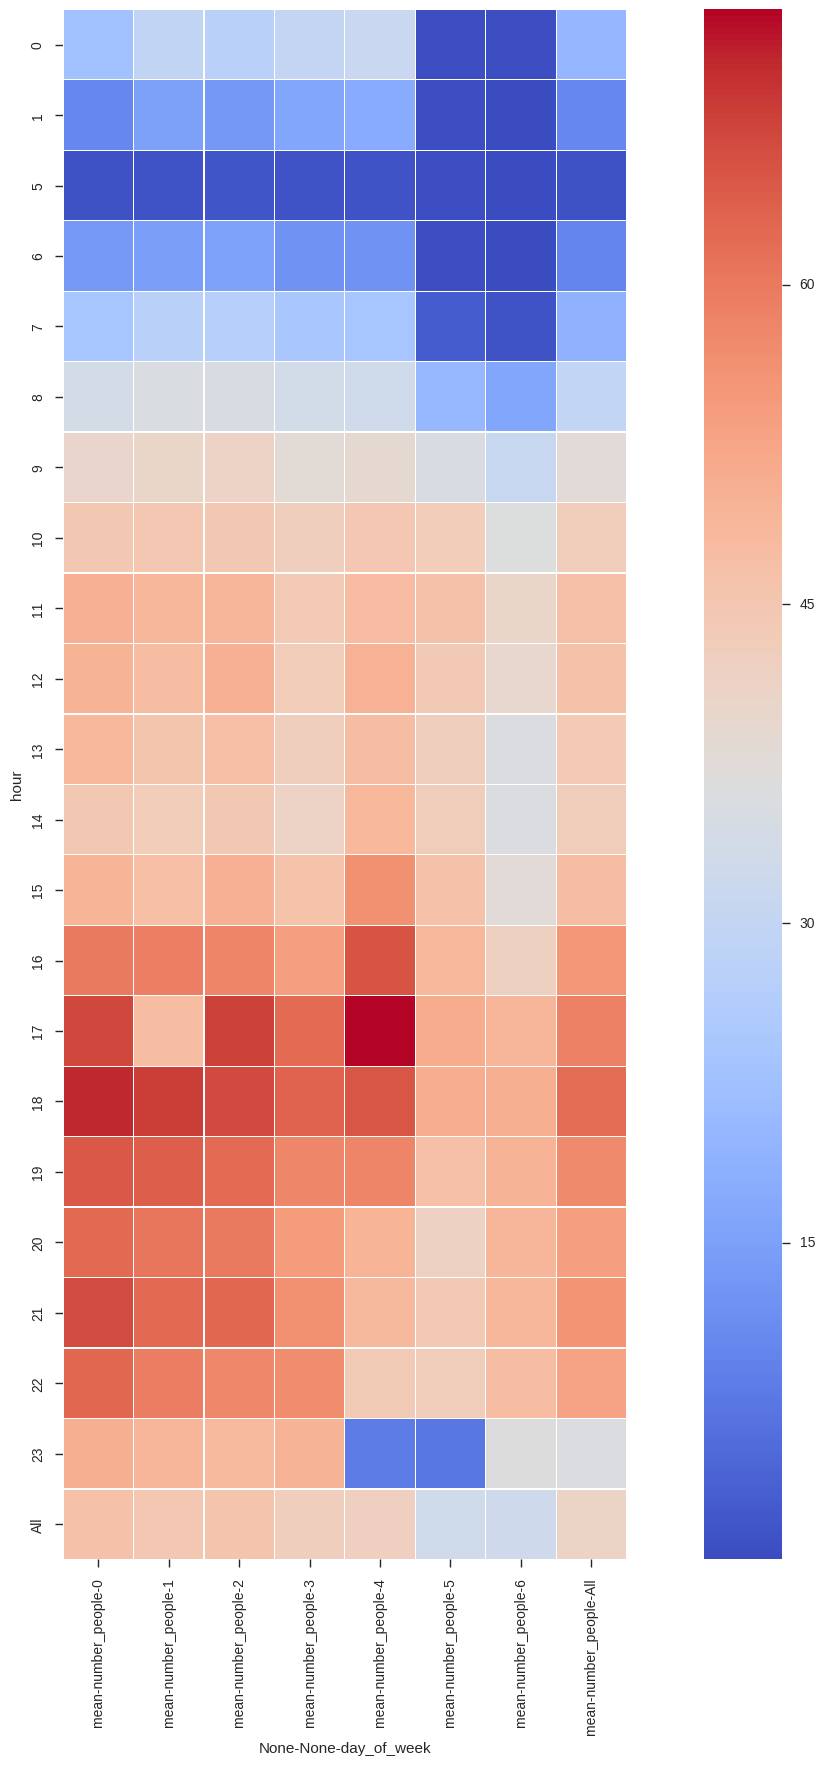

In [9]:
pivot = pd.pivot_table(df,
            values = ['number_people'],
            index = ['hour'], 
            columns= ['day_of_week'],
            aggfunc=[np.mean], 
            margins=True)
cmap = sns.cubehelix_palette(start = 1.5, rot = 1.5, as_cmap = False)
plt.subplots(figsize = (20, 20))
sns.heatmap(pivot,linewidths=0.2,square=True, cmap="coolwarm")

Notice the two blue squares at 2300 hrs on Friday and Saturday? Thats party time :) 

In [10]:
df.columns.values

array(['number_people', 'timestamp', 'day_of_week', 'is_weekend',
       'is_holiday', 'apparent_temperature', 'temperature',
       'is_start_of_semester', 'hour'], dtype=object)

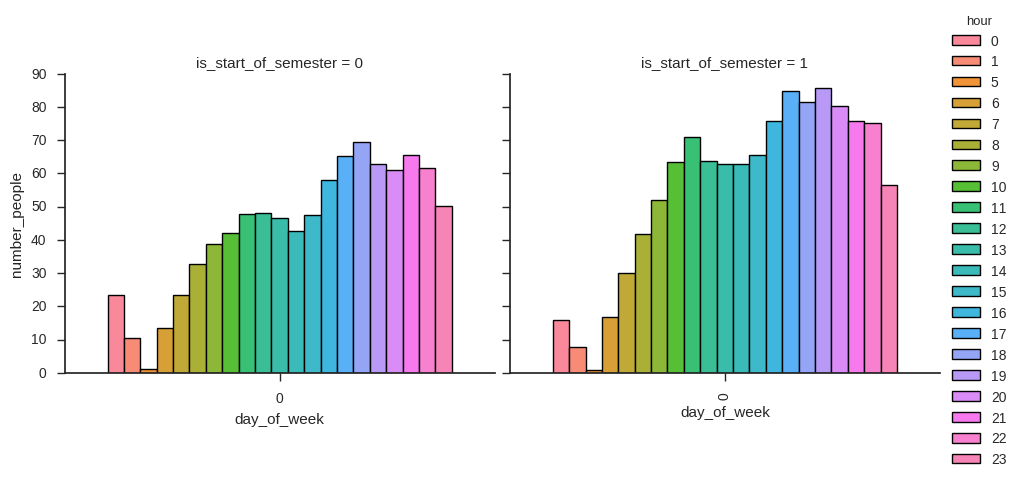

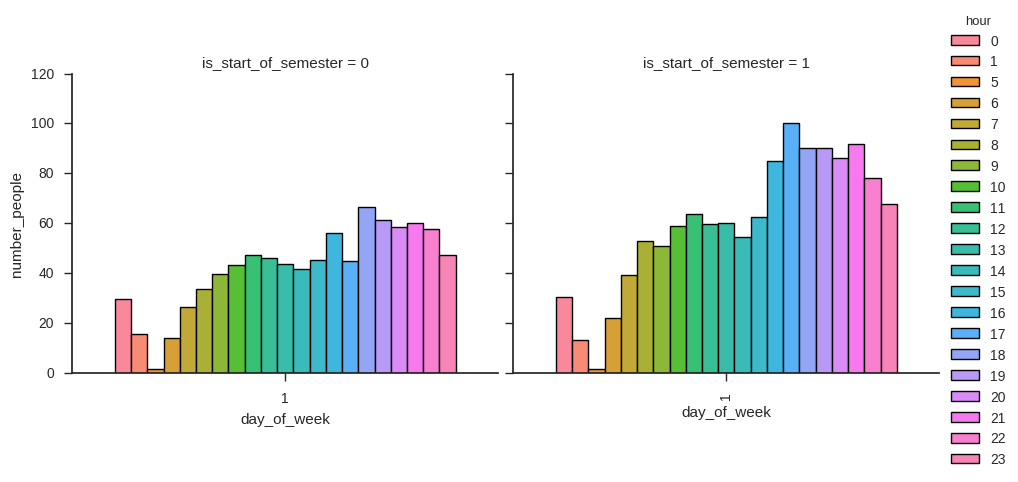

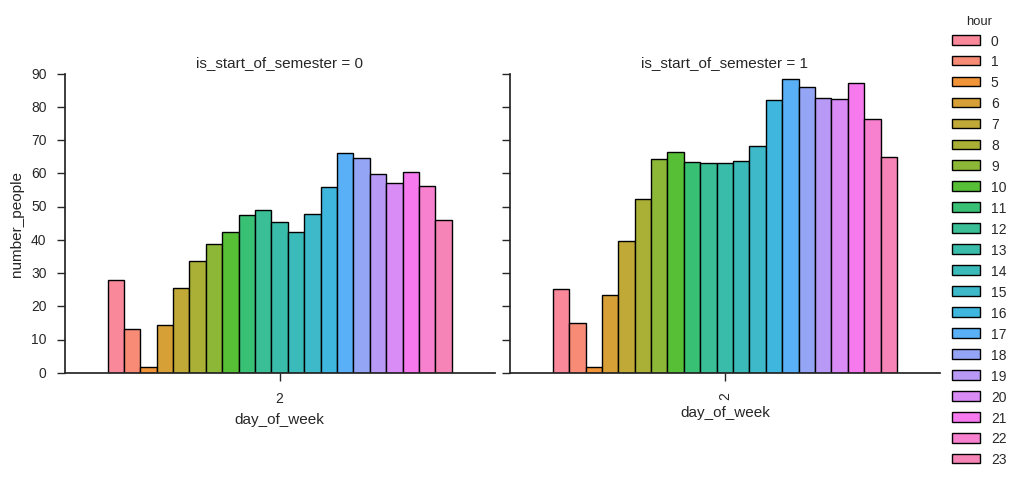

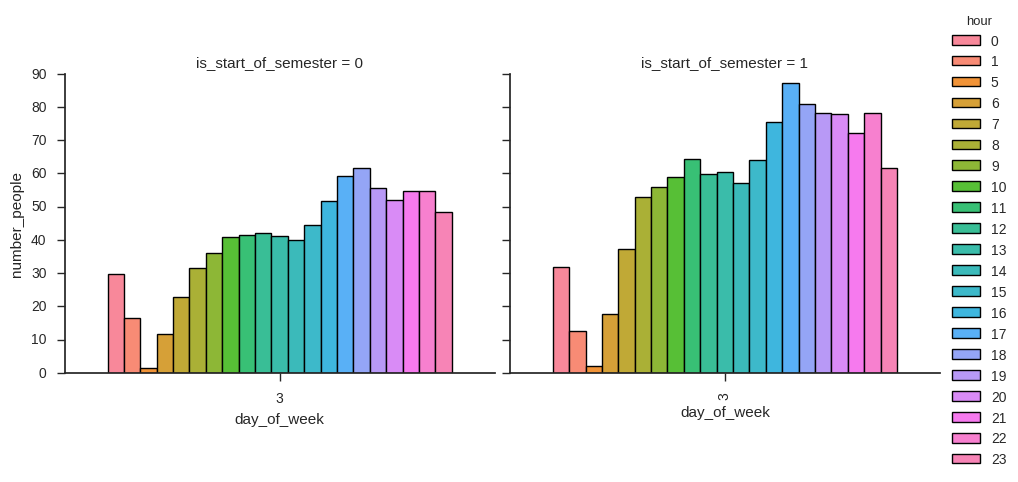

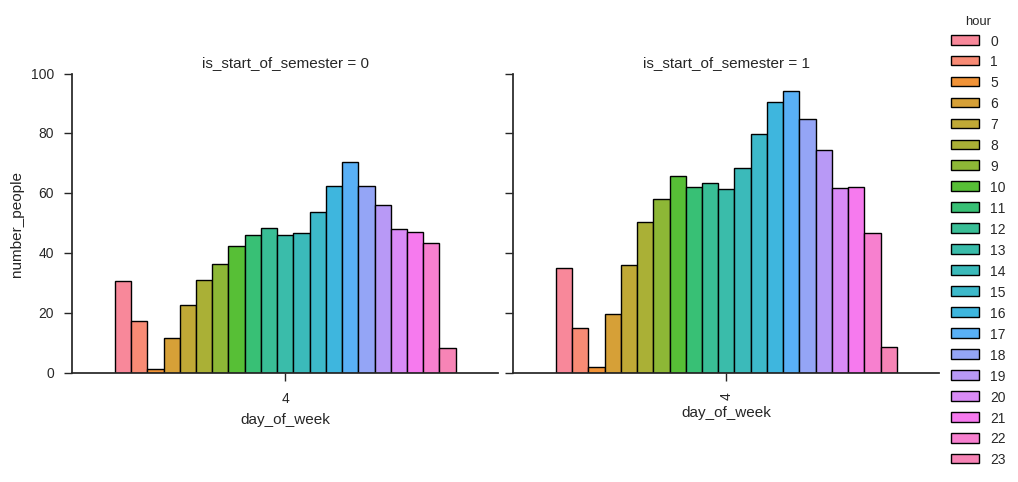

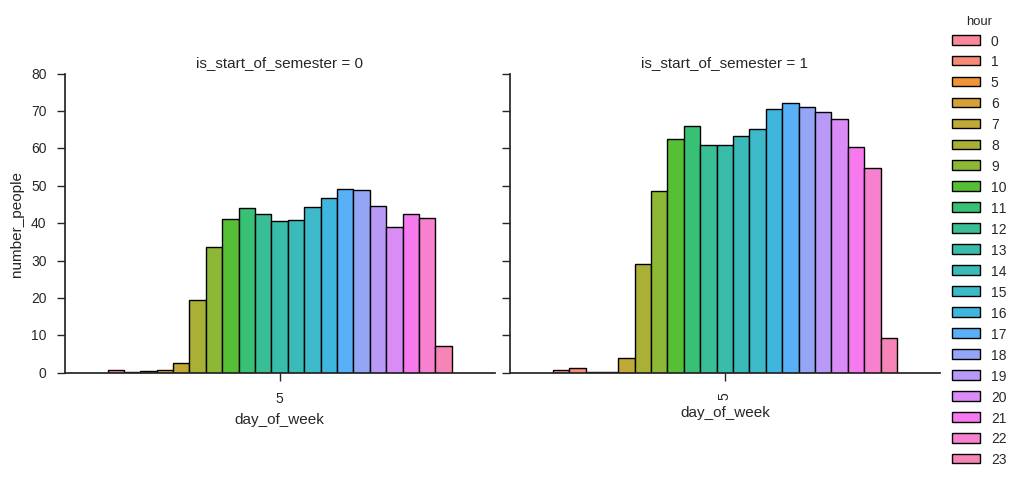

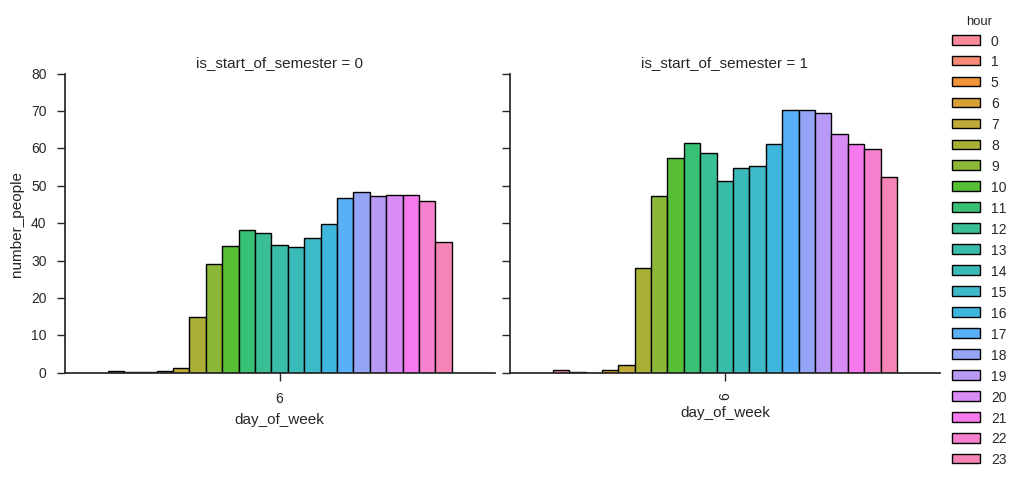

In [11]:
for i in set(df['day_of_week']):
    aa= df[df['day_of_week'].isin([i])]
    g = sns.factorplot(x='day_of_week', 
                       y="number_people",
                       data=aa, 
                       saturation=1, 
                       kind="bar", 
                       ci=None, 
                       aspect=1.2, 
                       linewidth=1, 
                       hue = 'hour', 
                      col = 'is_start_of_semester') 
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)

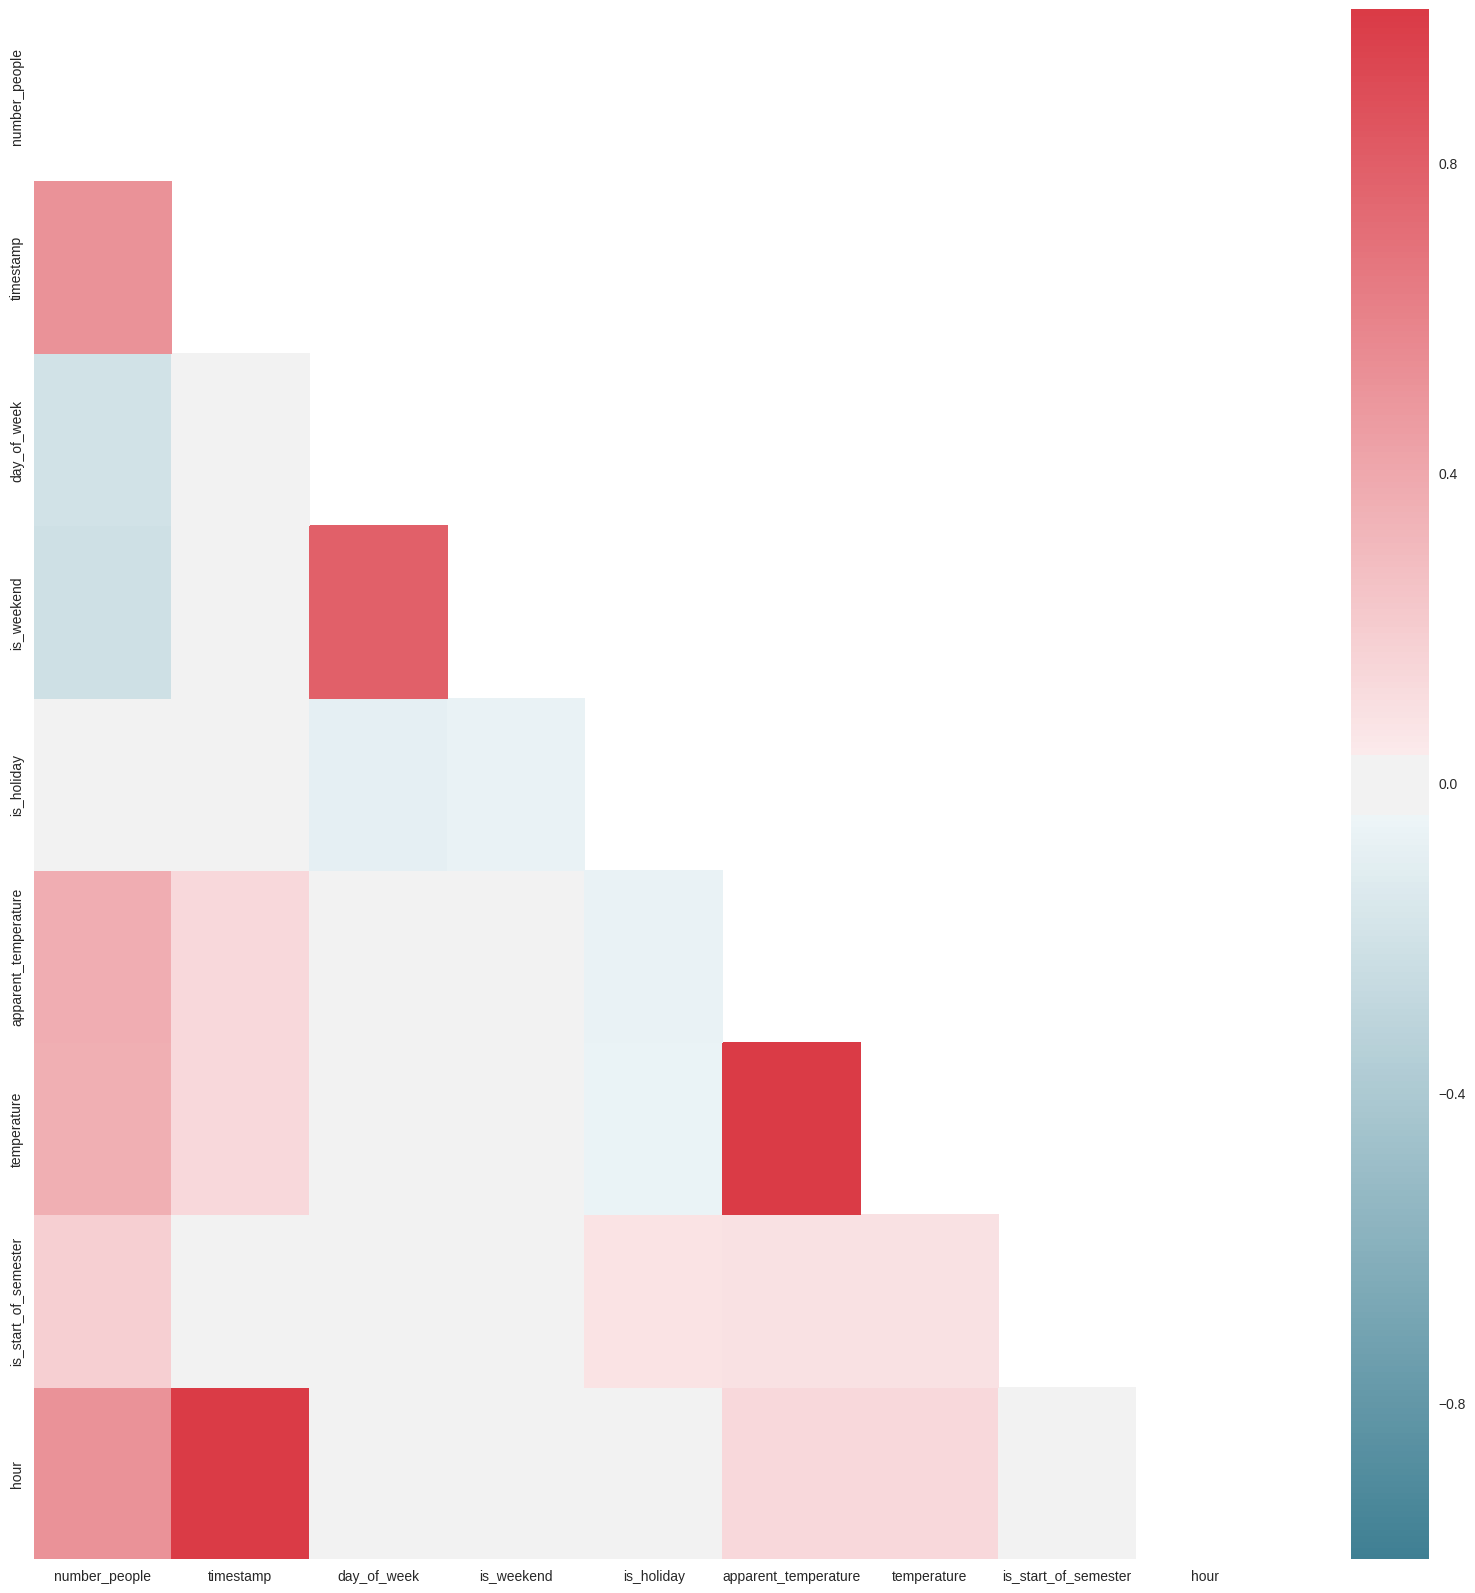

In [12]:
def heat_map(corrs_mat):
    sns.set(style="white")
    f, ax = plt.subplots(figsize=(20, 20))
    mask = np.zeros_like(corrs_mat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True 
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corrs_mat, mask=mask, cmap=cmap, ax=ax)

variable_correlations = df.corr()
#variable_correlations
heat_map(variable_correlations)

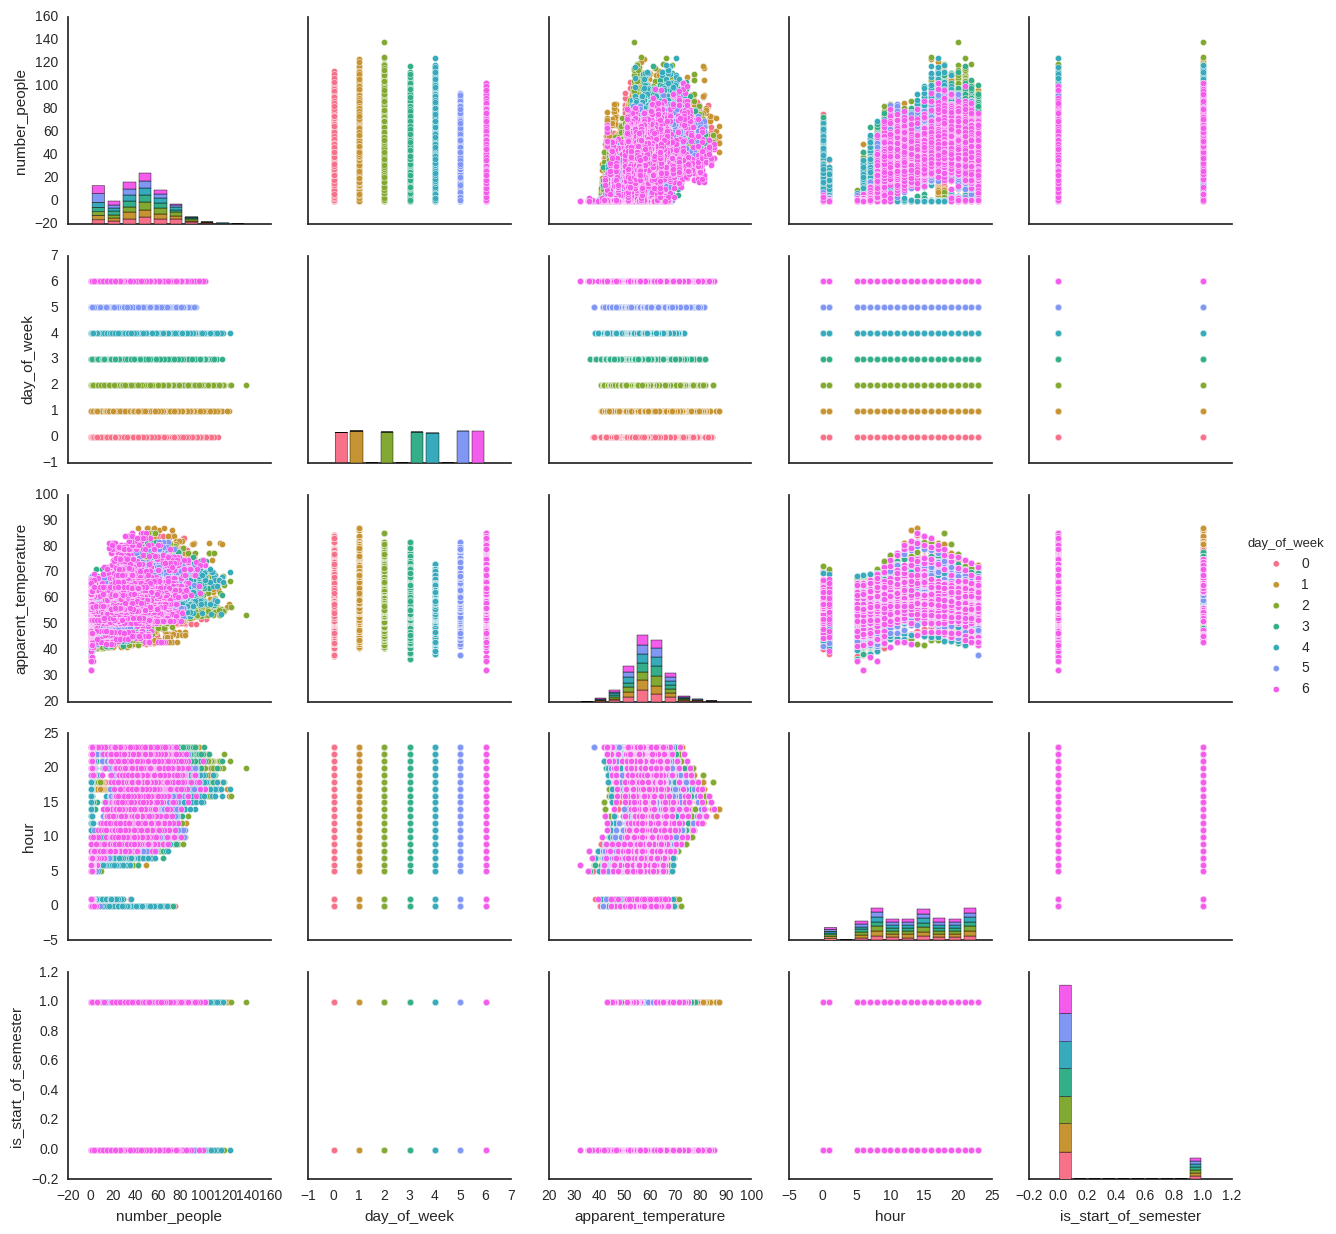

In [13]:
df_small = df[['number_people', 
               'day_of_week', 
#               'is_weekend',
#               'is_holiday', 
               'apparent_temperature', 
               'hour',
#               'temperature',
               'is_start_of_semester']]
sns.pairplot(df_small, hue='day_of_week')

In [14]:
df.columns.values

array(['number_people', 'timestamp', 'day_of_week', 'is_weekend',
       'is_holiday', 'apparent_temperature', 'temperature',
       'is_start_of_semester', 'hour'], dtype=object)

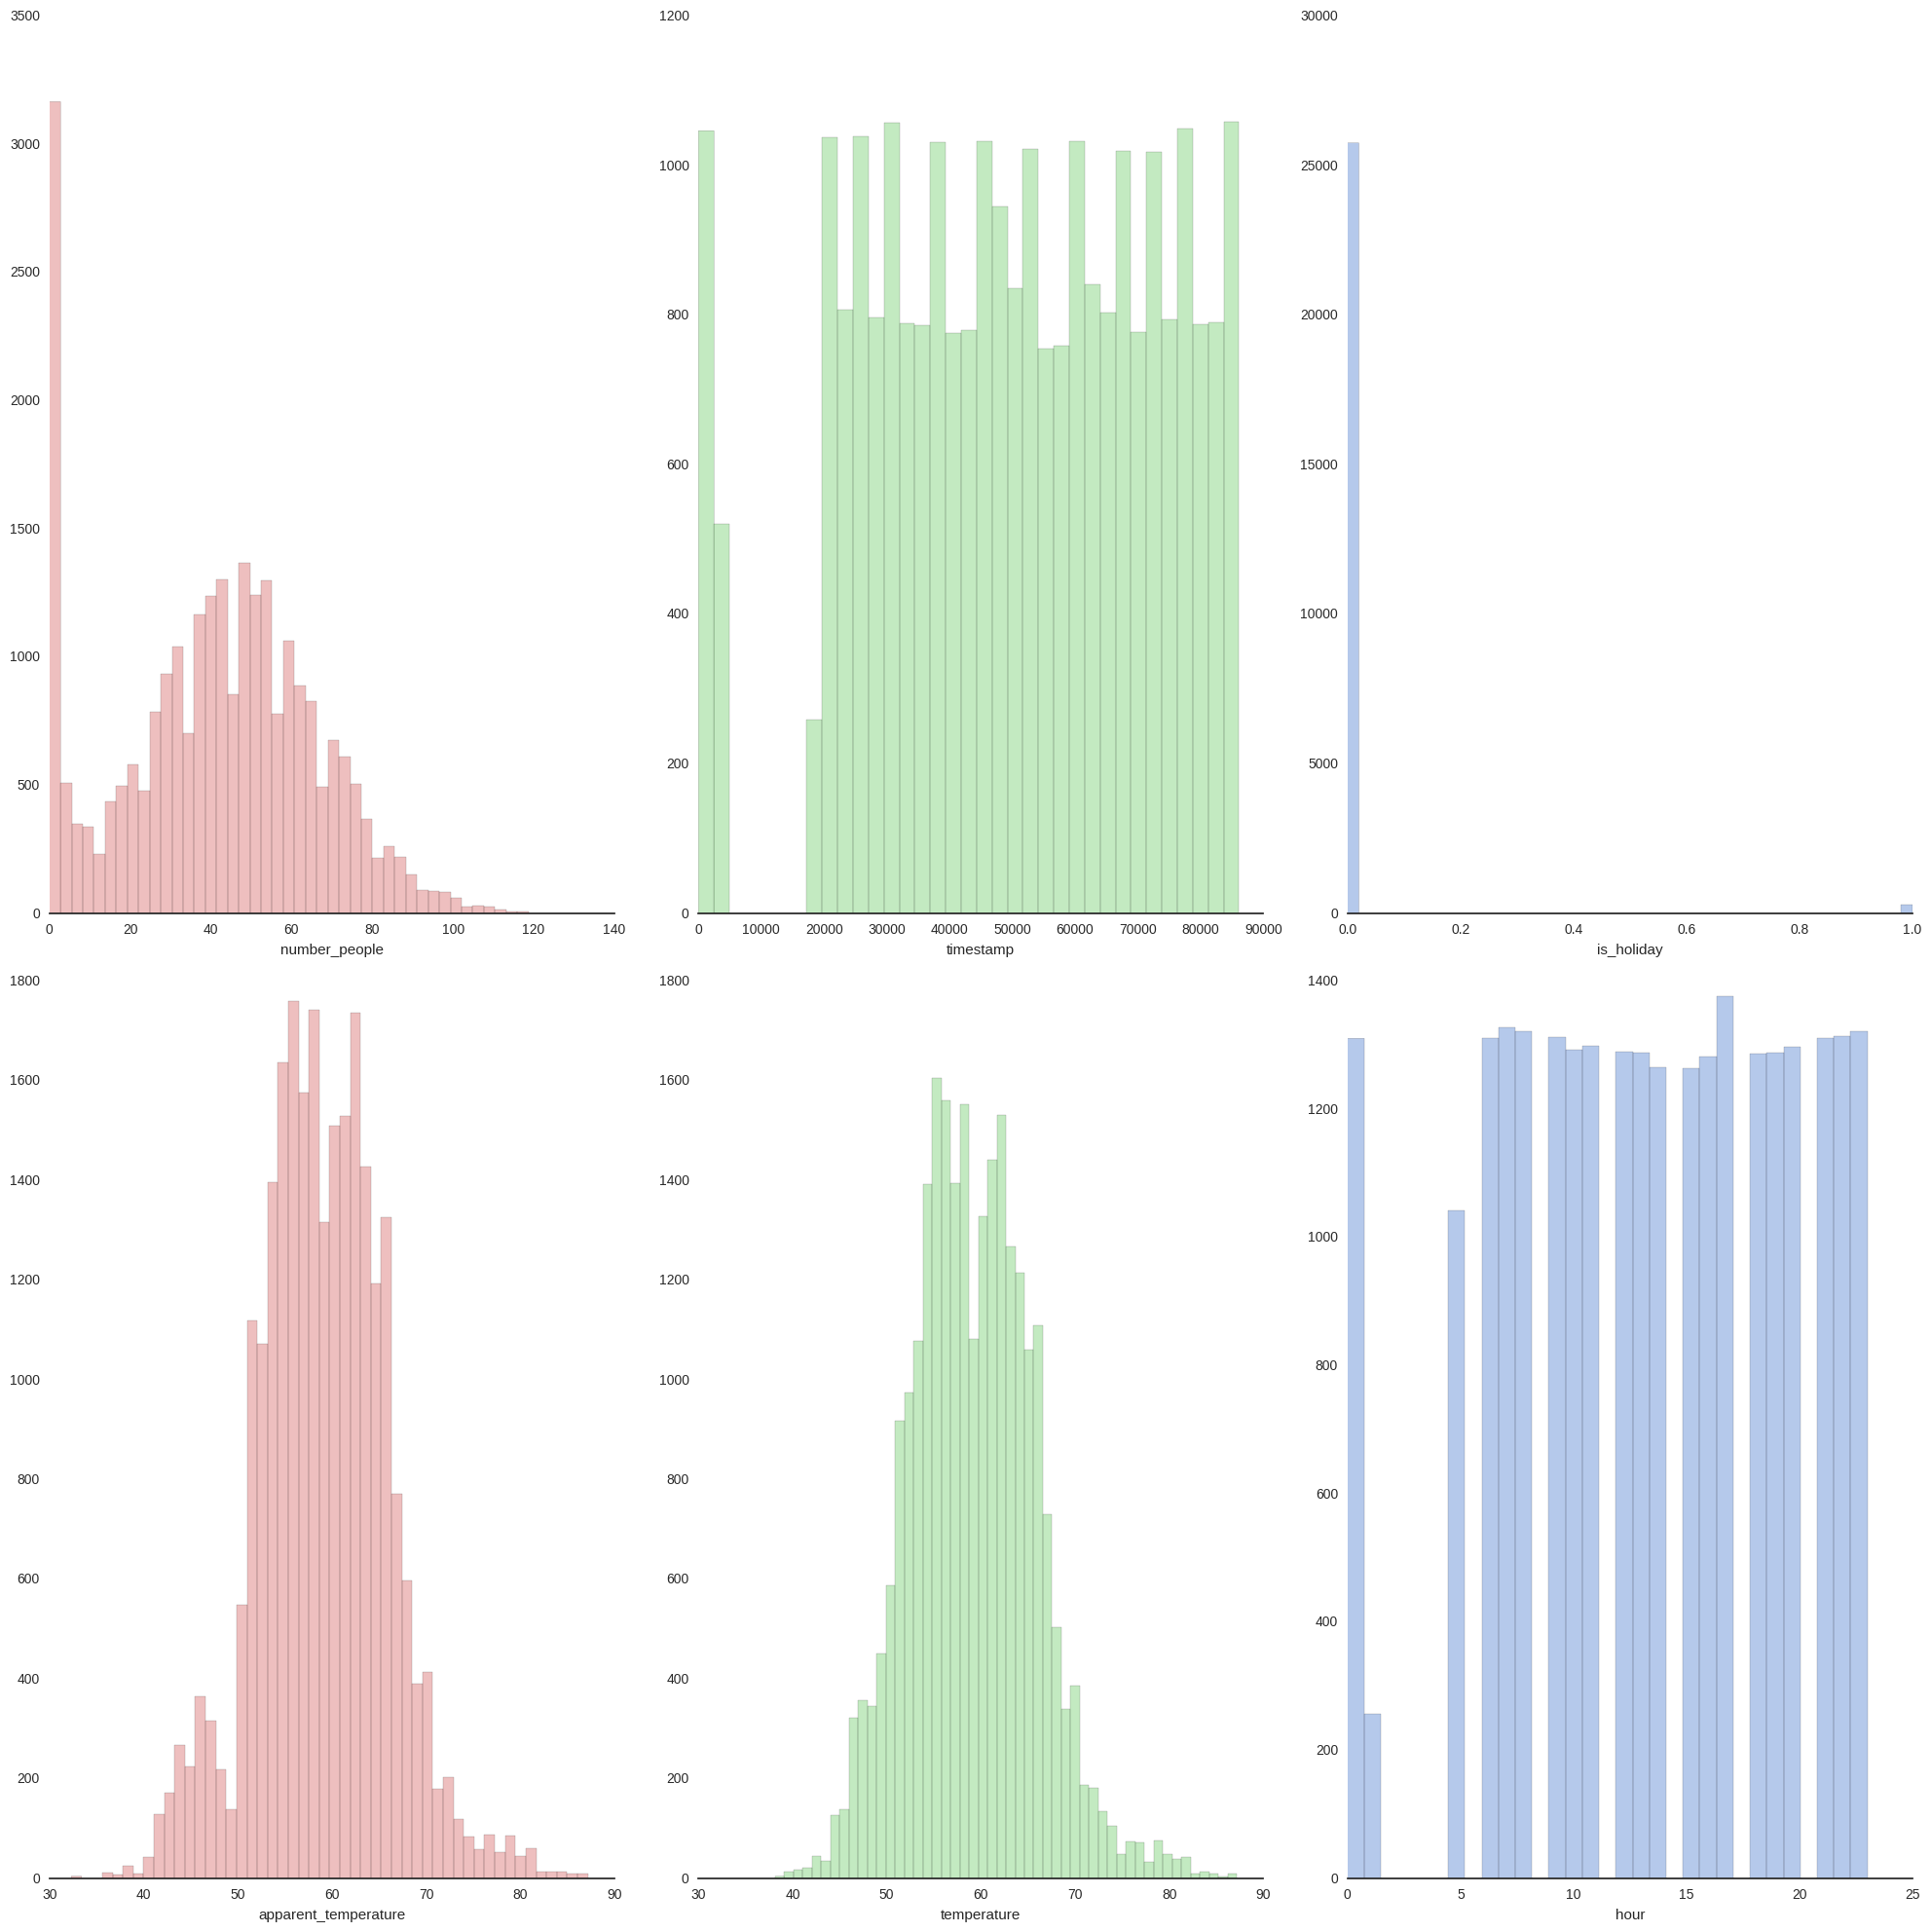

In [15]:
#data = df
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 3, figsize=(20,20))
sns.despine(left=True)
sns.distplot(df['number_people'],         kde=False, color="r", ax=axes[0, 0])
sns.distplot(df['timestamp'],             kde=False, color="g", ax=axes[0, 1])
sns.distplot(df['is_holiday'],            kde=False, color="b", ax=axes[0, 2])
sns.distplot(df['apparent_temperature'],  kde=False, color="r", ax=axes[1, 0])
sns.distplot(df['temperature'],           kde=False, color="g", ax=axes[1, 1])
sns.distplot(df['hour'],                  kde=False, color="b", ax=axes[1, 2])
plt.tight_layout()

In [16]:
mod_df = pd.get_dummies(df)
categorical_features = (mod_df.select_dtypes(include=['object']).columns.values)
categorical_features

array([], dtype=object)

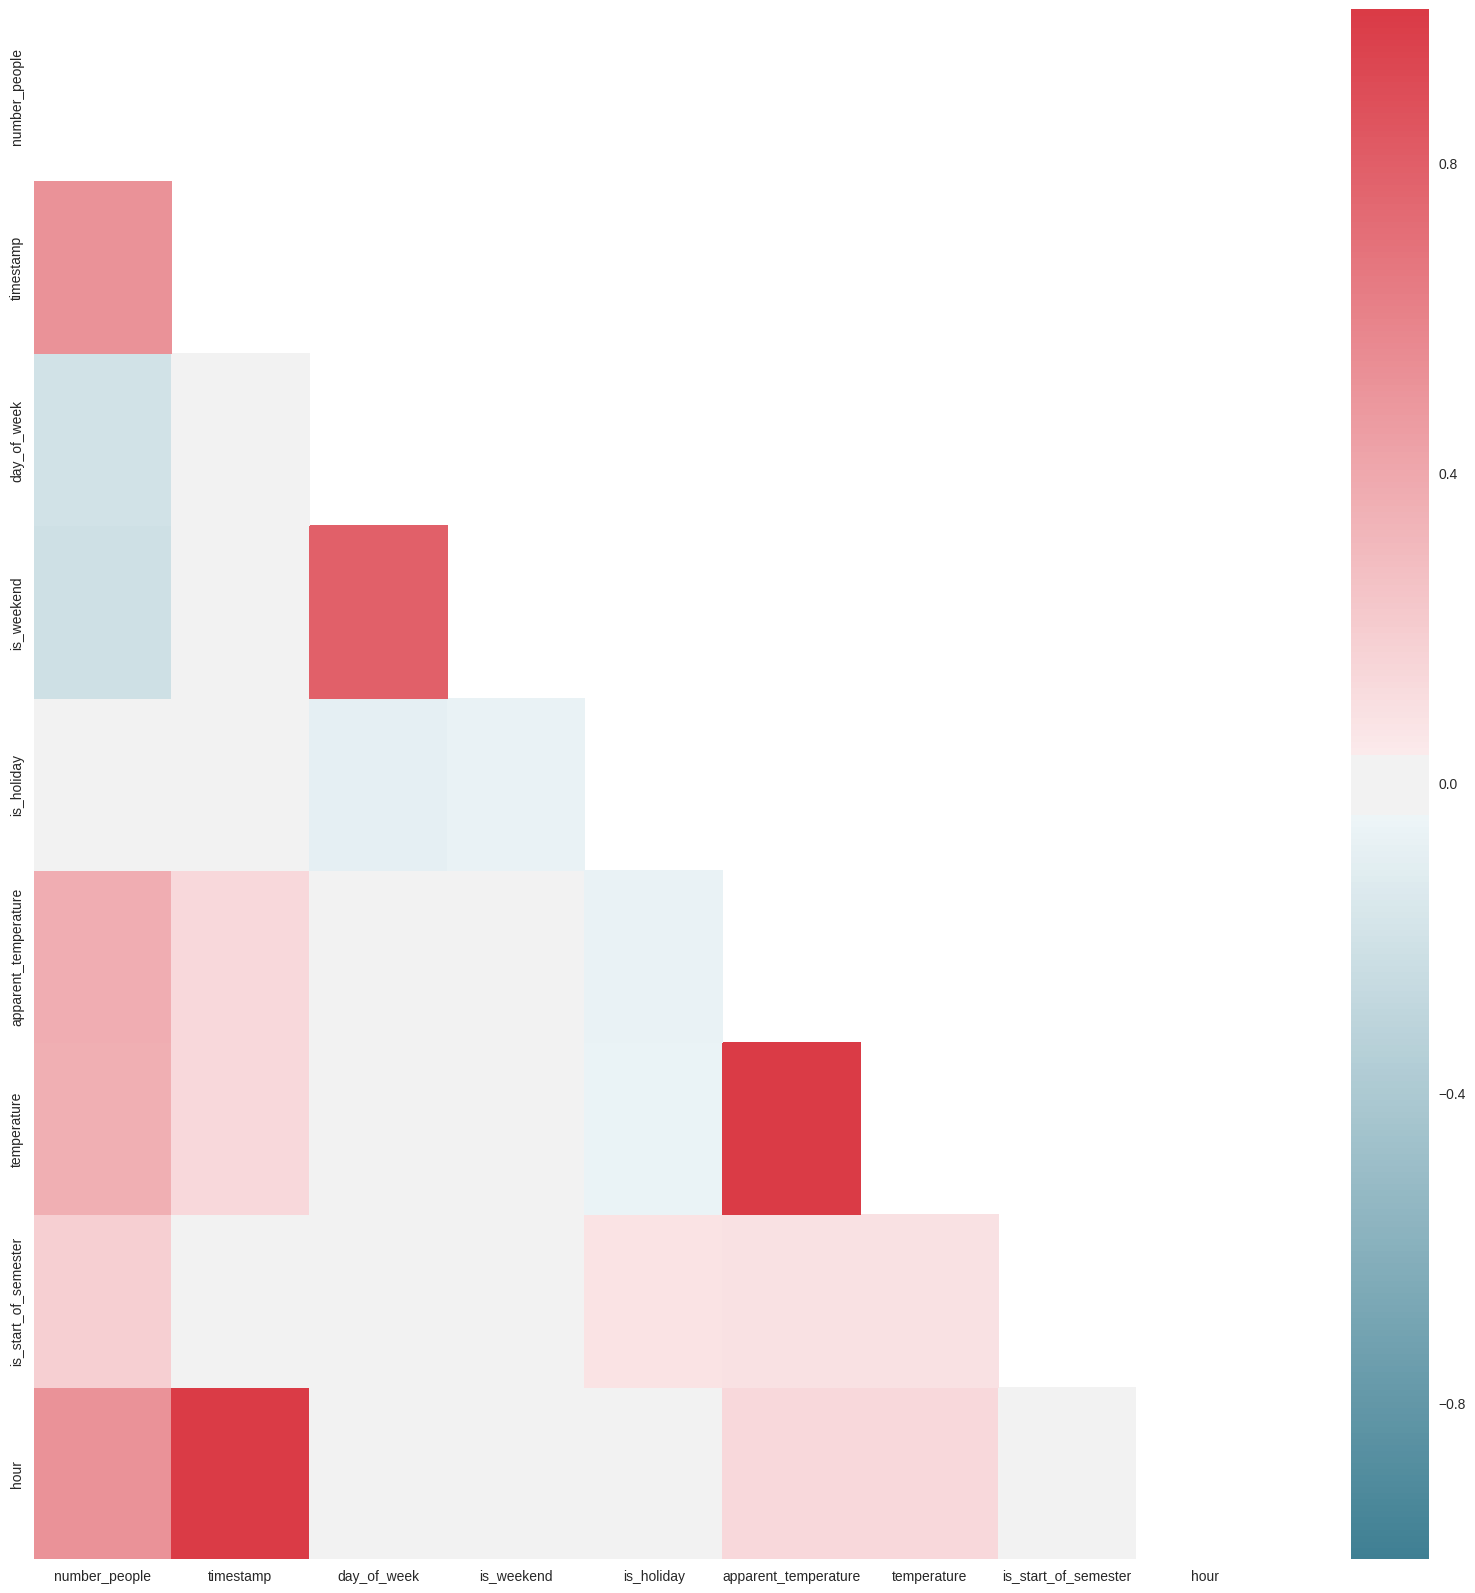

In [17]:
mod_df_variable_correlations = mod_df.corr()
#variable_correlations
heat_map(mod_df_variable_correlations)

In [18]:
df.columns

Index(['number_people', 'timestamp', 'day_of_week', 'is_weekend', 'is_holiday',
       'apparent_temperature', 'temperature', 'is_start_of_semester', 'hour'],
      dtype='object')

In [19]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
#import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn import svm

df_small = df[['number_people', 
               'day_of_week', 
               'is_weekend',
               'is_holiday', 
               'apparent_temperature', 
               #'temperature',
               'hour',
               'is_start_of_semester']]


df_copy = pd.get_dummies(df_small)

df1 = df_copy
y = np.asarray(df1['number_people'], dtype="|S6")
df1 = df1.drop(['number_people'],axis=1)
X = df1.values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30)

radm = RandomForestClassifier()
radm.fit(Xtrain, ytrain)

clf = radm
indices = np.argsort(radm.feature_importances_)[::-1]

# Print the feature ranking
print('Feature ranking:')

for f in range(df1.shape[1]):
    print('%d. feature %d %s (%f)' % (f+1 , 
                                      indices[f], 
                                      df1.columns[indices[f]], 
                                      radm.feature_importances_[indices[f]]))

Feature ranking:
1. feature 3 apparent_temperature (0.705360)
2. feature 4 hour (0.195591)
3. feature 0 day_of_week (0.077695)
4. feature 5 is_start_of_semester (0.010280)
5. feature 1 is_weekend (0.007351)
6. feature 2 is_holiday (0.003723)


In [20]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV, SelectKBest
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

classifiers = [('RandomForestClassifierG', RandomForestClassifier(n_jobs=-1, criterion='gini')),
               ('RandomForestClassifierE', RandomForestClassifier(n_jobs=-1, criterion='entropy')),
               ('AdaBoostClassifier', AdaBoostClassifier()),
               ('ExtraTreesClassifier', ExtraTreesClassifier(n_jobs=-1)),
               ('KNeighborsClassifier', KNeighborsClassifier(n_jobs=-1)),
               ('DecisionTreeClassifier', DecisionTreeClassifier()),
               ('ExtraTreeClassifier', ExtraTreeClassifier()),
               ('LogisticRegression', LogisticRegression()),
               ('GaussianNB', GaussianNB()),
               ('BernoulliNB', BernoulliNB())
              ]
allscores = []

x, Y = df_copy.drop('number_people', axis=1), df_copy['number_people']

for name, classifier in classifiers:
    scores = []
    for i in range(1): # 3 runs
        roc = cross_val_score(classifier, x, Y)
        scores.extend(list(roc))
    scores = np.array(scores)
    print(name, scores.mean())
    new_data = [(name, score) for score in scores]
    allscores.extend(new_data)

RandomForestClassifierG 0.059071010358
RandomForestClassifierE 0.0569596932032
AdaBoostClassifier 0.021905473861
ExtraTreesClassifier 0.0573149518895
KNeighborsClassifier 0.0598237877389
DecisionTreeClassifier 0.0574580130063
ExtraTreeClassifier 0.0520891602641
LogisticRegression 0.0726930751048
GaussianNB 0.0151097850427
BernoulliNB 0.0695124163576


[None, None, None, None, None, None, None, None, None, None]

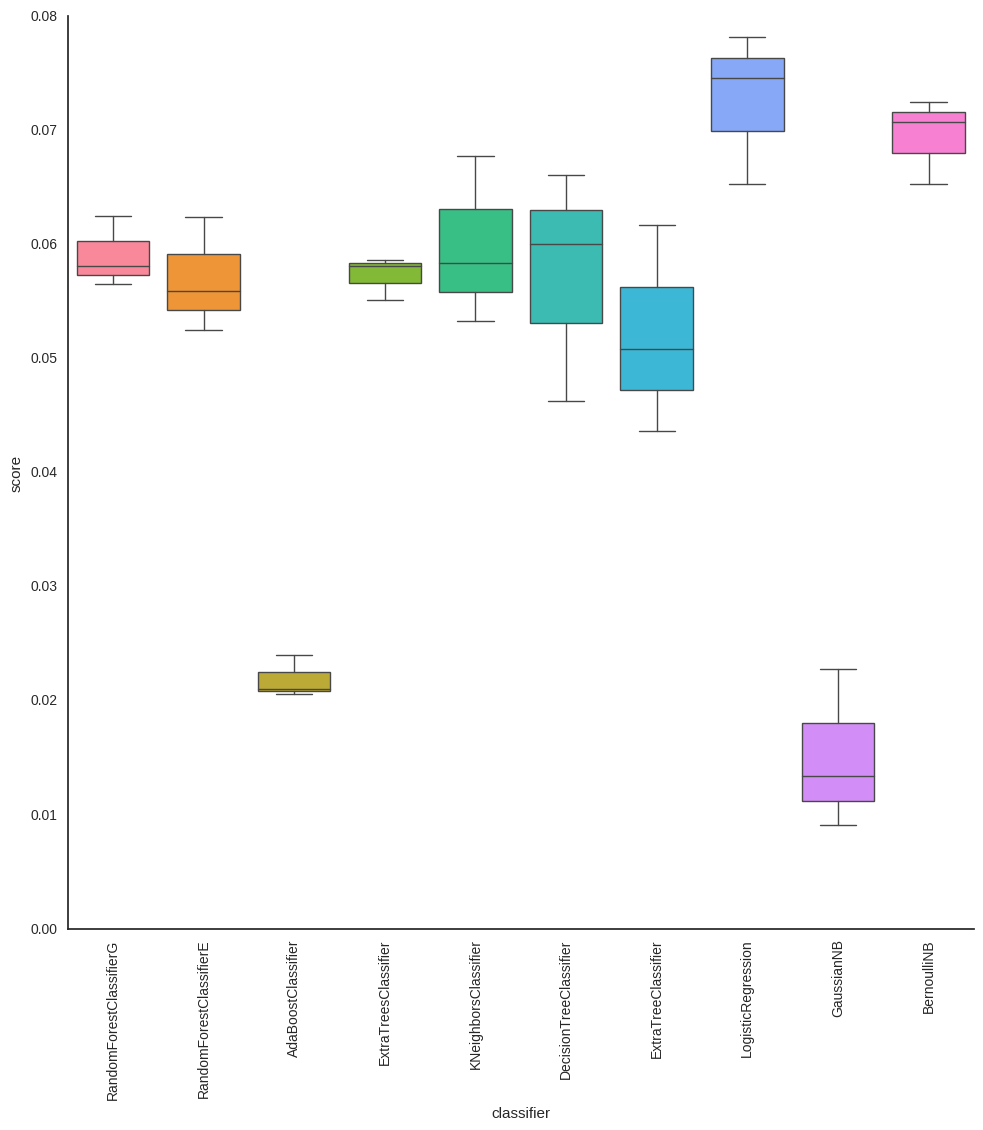

In [21]:
temp = pd.DataFrame(allscores, columns=['classifier', 'score'])
#sns.violinplot('classifier', 'score', data=temp, inner=None, linewidth=0.3)
plt.figure(figsize=(15,10))
sns.factorplot(x='classifier', 
               y="score",
               data=temp, 
               saturation=1, 
               kind="box", 
               ci=None, 
               aspect=1, 
               linewidth=1, 
               size = 10)     
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)